In [215]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn import metrics as mt
from sklearn.metrics import roc_curve, auc
import operator

In [7]:
directory = 'C:/githubrepo/7331_Project/data/'
df_zg = pd.read_csv(directory + 'Diabetic_Cleaned.csv')
print("Done reading data.")

Done reading data.


### Getting the column names of each type and making a dataframe of each

In [14]:
ordinal = ["age", "time_in_hospital"]
categorical = ["race", "gender", "admission_type_id", "discharge_disposition_id",
               "admission_source_id", "medical_specialty", "max_glu_serum",
               "A1Cresult", "change", "diabetesMed", "diag_1_val", "diag_2_val",
               "diag_3_val", "meds_increased"]
continuous = ["num_lab_procedures", "num_procedures", "num_medications",
              "number_outpatient", "number_emergency", "number_inpatient",
              "number_diagnoses", "medication_count"]
medicines = ["metformin", "repaglinide", "nateglinide", "chlorpropamide",
             "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide",
             "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone",
             "tolazamide", "insulin", "glyburide-metformin", "glipizide-metformin",
             "metformin-rosiglitazone", "metformin-pioglitazone"]
response = ["readmitted_tf"]

In [50]:
df_zg_ordinal = df_zg[ordinal]
df_zg_categorical = df_zg[categorical]
df_zg_continuous = df_zg[continuous]
df_zg_medicines = df_zg[medicines]
df_zg_response = df_zg[response]

### Make Age Ordinal

In [51]:
for i in range(0, 10):
    val = "[" + str(i*10) + "-" + str((i+1)*10) + ")"
    df_zg_ordinal.loc[df_zg_ordinal['age'] == val, 'age'] = i

### Making all categorical columns categorical

In [52]:
df_zg_categorical['admission_type_id'] = df_zg_categorical['admission_type_id'].astype(object)
df_zg_categorical['discharge_disposition_id'] = df_zg_categorical['discharge_disposition_id'].astype(object)
df_zg_categorical['admission_source_id'] = df_zg_categorical['admission_source_id'].astype(object)
df_zg_categorical['admission_type_id'] = df_zg_categorical['admission_type_id'].astype(object)
df_zg_categorical['meds_increased'] = df_zg_categorical['meds_increased'].astype(object)
#df_zg_response['readmitted_tf'] = df_zg_response['readmitted_tf'].astype(object)
print("Done")

Done


### Creating X and Y dataframes

In [190]:
df_zg_x = pd.concat([df_zg_ordinal, df_zg_categorical, df_zg_continuous], axis = 1)
df_zg_num_x = pd.concat([df_zg_ordinal, df_zg_continuous], axis = 1)
df_zg_med_x = pd.concat([df_zg_ordinal, df_zg_categorical, df_zg_continuous, df_zg_medicines], axis = 1)
df_zg_hot_x = pd.concat([df_zg_ordinal, pd.get_dummies(df_zg_categorical), df_zg_continuous], axis = 1)
df_zg_hot_med_x = pd.concat([df_zg_ordinal, pd.get_dummies(df_zg_categorical), df_zg_continuous, pd.get_dummies(df_zg_medicines)], axis = 1)
df_zg_y = df_zg_response
print("Done")

Done


### Regular Logistic

In [200]:
#Setting up the training and test sets
x_train, x_test, y_train, y_test = train_test_split(df_zg_hot_x, df_zg_y, test_size = 0.2, random_state=7)
#x_train, x_test, y_train, y_test = train_test_split(df_zg_num_x, df_zg_y, test_size = 0.2, random_state=7)
x_train.reset_index()
y_train.reset_index()
x_test.reset_index()
y_test.reset_index()
x_train.shape, x_test.shape

((81412, 184), (20354, 184))

In [201]:
%%time
#Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)

Wall time: 6.83 s


In [208]:
# interpret the weights
# iterate over the coefficients
weights = model.coef_.T # take transpose to make a column vector
variable_names = x_train.columns
allWeight = zip(weights, variable_names)
allWeight = sorted(allWeight, key=lambda x: x[0])
for coef, name in allWeight:
    print(name, 'has weight of', coef[0])

discharge_disposition_id_11 has weight of -5.700398464737854
discharge_disposition_id_14 has weight of -2.7000546082994052
discharge_disposition_id_13 has weight of -1.7986746586318714
admission_source_id_9 has weight of -1.431682743833108
discharge_disposition_id_19 has weight of -0.9633735028897917
medical_specialty_Surgery-Cardiovascular/Thoracic has weight of -0.9382425372076224
admission_source_id_5 has weight of -0.8500552352710444
admission_type_id_4 has weight of -0.8038643570011736
admission_type_id_3 has weight of -0.7472474240946957
admission_source_id_4 has weight of -0.7453730803599892
admission_source_id_6 has weight of -0.7411382097057954
medical_specialty_Pediatrics-Endocrinology has weight of -0.6821686862786978
admission_type_id_5 has weight of -0.6786096911541909
admission_type_id_8 has weight of -0.6785492613645505
medical_specialty_DCPTEAM has weight of -0.6650250050178715
admission_source_id_2 has weight of -0.6530459305418624
admission_type_id_1 has weight of -0.

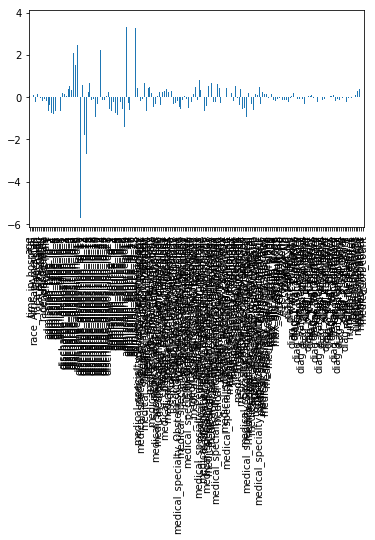

In [232]:
pd.Series(model.coef_[0].T,index=x_train.columns).plot(kind = 'bar')
plt.show()

In [193]:
#Prediction
y_pred = model.predict(x_test)

#Accuracy metrics
f1 = f1_score(y_test, y_pred, average = 'weighted')
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
print(f1, acc, roc)

0.6252256186423744 0.6362877075759065 0.6714583788778887


### CUSTOM THING

In [235]:
cat1 = ['discharge_disposition_id', 'admission_source_id', 'medical_specialty',
        'admission_type_id', 'diag_1_val']
df_zg_cust_x = pd.concat([pd.get_dummies(df_zg_categorical[cat1]), df_zg_continuous['number_inpatient'] ])

#Setting up the training and test sets
x_train, x_test, y_train, y_test = train_test_split(df_zg_cust_x, df_zg_y, test_size = 0.2, random_state=7)
#x_train, x_test, y_train, y_test = train_test_split(df_zg_num_x, df_zg_y, test_size = 0.2, random_state=7)
x_train.reset_index()
y_train.reset_index()
x_test.reset_index()
y_test.reset_index()
x_train.shape, x_test.shape

ValueError: Found input variables with inconsistent numbers of samples: [203532, 101766]

In [ ]:
%%time
#Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)

In [ ]:
# interpret the weights
# iterate over the coefficients
weights = model.coef_.T # take transpose to make a column vector
variable_names = x_train.columns
allWeight = zip(weights, variable_names)
allWeight = sorted(allWeight, key=lambda x: x[0])
for coef, name in allWeight:
    print(name, 'has weight of', coef[0])

In [ ]:
#Prediction
y_pred = model.predict(x_test)

#Accuracy metrics
f1 = f1_score(y_test, y_pred, average = 'weighted')
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
print(f1, acc, roc)

### SGD Logistic

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [194]:
regularize_const = 0.1
iterations = 5
# use some compact notation for creating a logistic regression classifier with stochastic descent
log_sgd = SGDClassifier(alpha = regularize_const,
        fit_intercept = True, l1_ratio = 0.0, learning_rate = 'optimal',
        loss = 'log', n_iter = iterations, n_jobs = -1, penalty = 'l2')

scl = StandardScaler()
log_sgd.fit(scl.fit_transform(x_train), y_train)
y_pred = log_sgd.predict(scl.transform(x_test))
conf = mt.confusion_matrix(y_test, y_pred)
acc = mt.accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'weighted')

print('Acc:', acc, "F1:", f1, '\nConfusion Matrix\n', conf)

Acc: 0.6293111919033114 F1: 0.6132571568146293 
Confusion Matrix
 [[8892 2077]
 [5468 3917]]


### Prediction using the Logistic SGD with CV... its bad

In [195]:
cv = StratifiedShuffleSplit( n_splits = 1, test_size = 0.5 )
scl = StandardScaler()
for train_idx, test_idx in cv.split(x_train, y_train):
    log_sgd.fit(scl.fit_transform(x_train.iloc[train_idx]), y_train.iloc[train_idx])
    yhat = log_sgd.predict(scl.transform(x_train.iloc[test_idx]))
    
    conf = mt.confusion_matrix(y_train.iloc[test_idx], yhat)
    acc = mt.accuracy_score(y_train.iloc[test_idx], yhat)

In [196]:
y_pred = log_sgd.predict(x_test)

#Accuracy metrics
f1 = f1_score(y_test, y_pred, average = 'weighted')
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
conf = mt.confusion_matrix(y_test, y_pred)
#print(f1, acc, roc)
print('Accuracy:', acc, '\nConfusion Matrix\n', conf)

Accuracy: 0.4610887294880613 
Confusion Matrix
 [[    0 10969]
 [    0  9385]]


In [156]:
def Find_Optimal_Cutoff(target, predicted):
    """Parameters:
    target : Matrix with dependent or target data, where rows are observations
    predicted : Matrix with predicted data, where rows are observations
    ----------
    Return: list type, with optimal cutoff value
    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

In [198]:
#print(Find_Optimal_Cutoff(y_test, y_pred))

fpr, tpr, threshold = roc_curve(y_test, y_pred)
i = np.arange(len(tpr))
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
roc

,tf,threshold
0,-1.0,2
1,1.0,1


In [197]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.500000
